In [2]:
import torch
from torch.nn import functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [ ]:
# torch.manual_seed(1)    # reproducible

In [3]:
print('generate fake data')
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

generate fake data


In [6]:
print("torch can only train on Variable, so convert them to Variable")
x, y = Variable(x), Variable(y)

torch can only train on Variable, so convert them to Variable


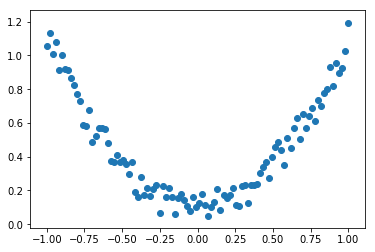

In [7]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [8]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)  # outut layer
        
    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)         
        # linear output
        return x

In [9]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)


In [10]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

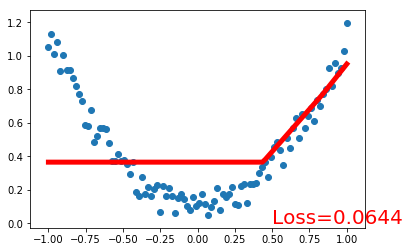

In [12]:
plt.ion()   # something about plotting

for t in range(100):
    prediction = net(x)               # input x and predict based on x
    loss = loss_func(prediction, y)   # must be (1. nn output, 2. target)
    optimizer.zero_grad()             # clear gradients for next train
    loss.backward()                   # backpropagation, compute gradients
    optimizer.step()                  # apply gradients
    
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

comparing it with linear regression


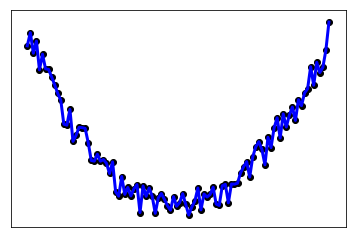

In [15]:
print("comparing it with linear regression")
from sklearn import linear_model
regr = linear_model.LinearRegression()
reg.fit(x.data.numpy(), y.data.numpy()) 
predicted = reg.predict(x.data.numpy())

plt.scatter(x.data.numpy(), y.data.numpy(),  color='black')
plt.plot(x.data.numpy(), y.data.numpy(), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()